In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

import warnings

warnings.filterwarnings('ignore')

In [31]:
customer = pd.read_csv(r"Customer.csv")
prod_info = pd.read_csv(r"prod_cat_info.csv")
transaction = pd.read_csv(r"Transactions.csv")

1. Merge the datasets Customers, Product Hierarchy and Transactions as Customer_Final. Ensure to
keep all customers who have done transactions with us and select the join type accordingly.

In [32]:

prod_info.rename(columns={"prod_sub_cat_code":"prod_subcat_code"},inplace=True)
# merge transaction and prod_info table and create a new table "prod_concat"
prod_concat = pd.merge(left=transaction, right=prod_info,on=["prod_cat_code","prod_subcat_code"],how="left")

customer_final = pd.merge(left=prod_concat, right=customer,right_on="customer_Id", left_on="cust_id", how="left")

customer_final

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat,customer_Id,DOB,Gender,city_code
0,80712190438,270351,28-02-2014,1,1,-5,-772,405.300,-4265.300,e-Shop,Clothing,Women,270351,26-09-1981,M,5.0
1,29258453508,270384,27-02-2014,5,3,-5,-1497,785.925,-8270.925,e-Shop,Electronics,Computers,270384,11-05-1973,F,8.0
2,51750724947,273420,24-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop,Books,DIY,273420,27-07-1992,M,8.0
3,93274880719,271509,24-02-2014,11,6,-3,-1363,429.345,-4518.345,e-Shop,Home and kitchen,Bath,271509,08-06-1981,M,3.0
4,51750724947,273420,23-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop,Books,DIY,273420,27-07-1992,M,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23048,94340757522,274550,25-01-2011,12,5,1,1264,132.720,1396.720,e-Shop,Books,Academic,274550,21-02-1972,M,7.0
23049,89780862956,270022,25-01-2011,4,1,1,677,71.085,748.085,e-Shop,Clothing,Mens,270022,27-04-1984,M,9.0
23050,85115299378,271020,25-01-2011,2,6,4,1052,441.840,4649.840,MBR,Home and kitchen,Furnishing,271020,20-06-1976,M,8.0
23051,72870271171,270911,25-01-2011,11,5,3,1142,359.730,3785.730,TeleShop,Books,Children,270911,22-05-1970,M,2.0


2. Prepare a summary report for the merged data set.
a. Get the column names and their corresponding data types

In [33]:
customer_final.dtypes

transaction_id        int64
cust_id               int64
tran_date            object
prod_subcat_code      int64
prod_cat_code         int64
Qty                   int64
Rate                  int64
Tax                 float64
total_amt           float64
Store_type           object
prod_cat             object
prod_subcat          object
customer_Id           int64
DOB                  object
Gender               object
city_code           float64
dtype: object

b. Top/Bottom 10 observations

In [34]:
customer_final.head(10)


,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat,customer_Id,DOB,Gender,city_code
0,80712190438,270351,28-02-2014,1,1,-5,-772,405.300,-4265.300,e-Shop,Clothing,Women,270351,26-09-1981,M,5.0
1,29258453508,270384,27-02-2014,5,3,-5,-1497,785.925,-8270.925,e-Shop,Electronics,Computers,270384,11-05-1973,F,8.0
2,51750724947,273420,24-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop,Books,DIY,273420,27-07-1992,M,8.0
3,93274880719,271509,24-02-2014,11,6,-3,-1363,429.345,-4518.345,e-Shop,Home and kitchen,Bath,271509,08-06-1981,M,3.0
4,51750724947,273420,23-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop,Books,DIY,273420,27-07-1992,M,8.0
5,97439039119,272357,23-02-2014,8,3,-2,-824,173.040,-1821.040,TeleShop,Electronics,Personal Appliances,272357,09-10-1982,F,6.0
6,45649838090,273667,22-02-2014,11,6,-1,-1450,152.250,-1602.250,e-Shop,Home and kitchen,Bath,273667,29-05-1981,M,9.0
7,22643667930,271489,22-02-2014,12,6,-1,-1225,128.625,-1353.625,TeleShop,Home and kitchen,Tools,271489,21-04-1971,M,9.0
8,79792372943,275108,22-02-2014,3,1,-3,-908,286.020,-3010.020,MBR,Clothing,Kids,275108,04-11-1971,F,8.0
9,50076728598,269014,21-02-2014,8,3,-4,-581,244.020,-2568.020,e-Shop,Electronics,Personal Appliances,269014,27-11-1979,F,3.0


In [35]:
customer_final.tail(10)

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat,customer_Id,DOB,Gender,city_code
23043,49882891062,271982,25-01-2011,10,5,4,1330,558.600,5878.600,e-Shop,Books,Non-Fiction,271982,10-08-1976,M,8.0
23044,14787475597,273982,25-01-2011,4,3,5,969,508.725,5353.725,e-Shop,Electronics,Mobiles,273982,12-10-1991,M,4.0
23045,50691119572,273031,25-01-2011,6,5,1,1148,120.540,1268.540,TeleShop,Books,DIY,273031,17-01-1980,F,8.0
23046,40893803228,272049,25-01-2011,11,6,3,1077,339.255,3570.255,e-Shop,Home and kitchen,Bath,272049,28-06-1975,F,6.0
23047,30856003613,266866,25-01-2011,4,2,2,444,93.240,981.240,TeleShop,Footwear,Kids,266866,18-04-1974,M,4.0
23048,94340757522,274550,25-01-2011,12,5,1,1264,132.720,1396.720,e-Shop,Books,Academic,274550,21-02-1972,M,7.0
23049,89780862956,270022,25-01-2011,4,1,1,677,71.085,748.085,e-Shop,Clothing,Mens,270022,27-04-1984,M,9.0
23050,85115299378,271020,25-01-2011,2,6,4,1052,441.840,4649.840,MBR,Home and kitchen,Furnishing,271020,20-06-1976,M,8.0
23051,72870271171,270911,25-01-2011,11,5,3,1142,359.730,3785.730,TeleShop,Books,Children,270911,22-05-1970,M,2.0
23052,77960931771,271961,25-01-2011,11,5,1,447,46.935,493.935,TeleShop,Books,Children,271961,15-01-1982,M,1.0


c. “Five-number summary” for continuous variables (min, Q1, median, Q3 and max)

In [36]:
customer_final.describe()


,transaction_id,cust_id,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,customer_Id,city_code
count,2.305300e+04,23053.000000,23053.000000,23053.000000,23053.000000,23053.000000,23053.000000,23053.000000,23053.000000,23045.000000
mean,5.007348e+10,271021.746497,6.149091,3.763632,2.432395,636.369713,248.667192,2107.308002,271021.746497,5.482534
std,2.898194e+10,2431.692059,3.726372,1.677016,2.268406,622.363498,187.177773,2507.561264,2431.692059,2.863499
min,3.268991e+06,266783.000000,1.000000,1.000000,-5.000000,-1499.000000,7.350000,-8270.925000,266783.000000,1.000000
25%,2.493864e+10,268935.000000,3.000000,2.000000,1.000000,312.000000,98.280000,762.450000,268935.000000,3.000000
50%,5.009313e+10,270980.000000,5.000000,4.000000,3.000000,710.000000,199.080000,1754.740000,270980.000000,5.000000
75%,7.533000e+10,273114.000000,10.000000,5.000000,4.000000,1109.000000,365.715000,3569.150000,273114.000000,8.000000
max,9.998755e+10,275265.000000,12.000000,6.000000,5.000000,1500.000000,787.500000,8287.500000,275265.000000,10.000000


(d) Frequency tables for all the categorical variables


In [37]:
customer_final.loc[:,customer_final.dtypes=="object"].describe()

,tran_date,Store_type,prod_cat,prod_subcat,DOB,Gender
count,23053,23053,23053,23053,23053,23044
unique,1129,4,6,18,3987,2
top,13-07-2011,e-Shop,Books,Women,27-12-1988,M
freq,35,9311,6069,3048,32,11811


(3) Generate histograms for all continuous variables and frequency bars for categorical variables

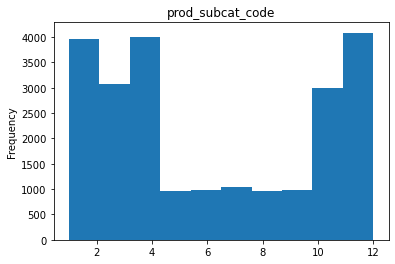

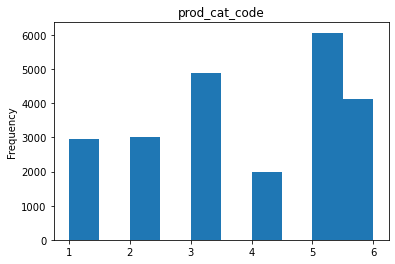

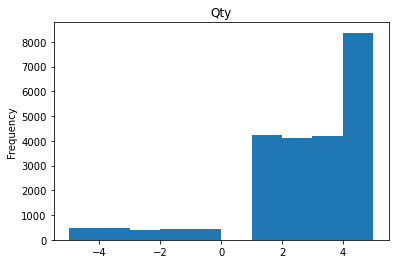

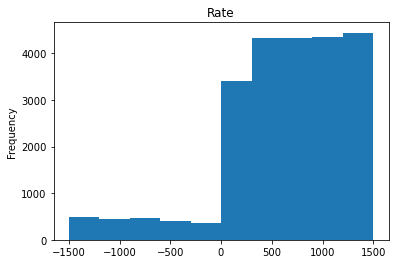

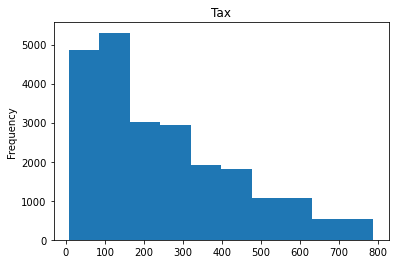

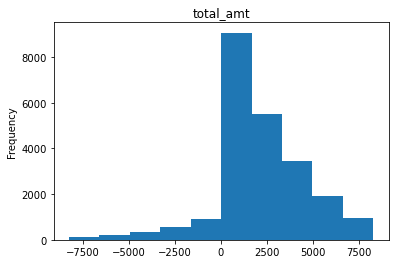

In [38]:
conti_customer = customer_final.loc[:,['prod_subcat_code','prod_cat_code', 'Qty', 'Rate', 'Tax', 'total_amt']]
for var in conti_customer.columns:
    conti_customer[var].plot(kind='hist')
    plt.title(var)
    plt.show()

In [39]:
category_customer = customer_final.loc[:,customer_final.dtypes=='object']

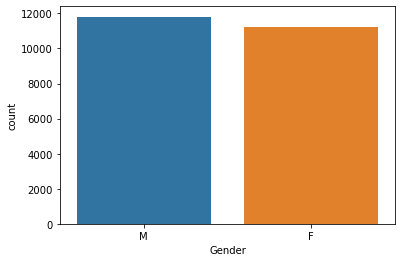

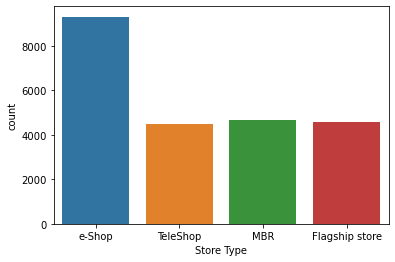

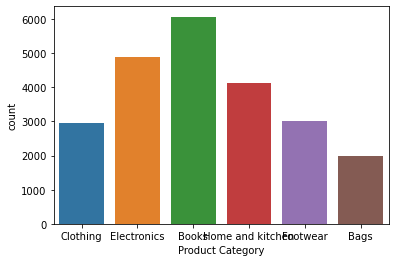

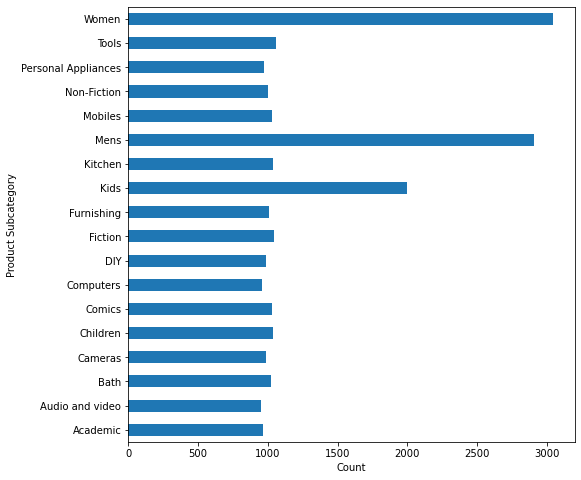

In [40]:
plt.figure()
sns.countplot(category_customer['Gender'])
plt.show()

plt.figure()
sns.countplot(category_customer['Store_type'])
plt.xlabel('Store Type')
plt.show()

plt.figure()
sns.countplot(category_customer['prod_cat'])
plt.xlabel('Product Category')
plt.show()

plt.figure(figsize=(8,8))
category_customer.groupby('prod_subcat')['prod_subcat'].count().plot(kind='barh')
plt.xlabel('Count')
plt.ylabel('Product Subcategory')
plt.show()


(4) Calculate the following information using the merged dataset:
(a) Time period of the available transaction data


In [41]:
customer_final.sort_values(by="tran_date")
min_date = customer_final["tran_date"].min()
max_date = customer_final["tran_date"].max()

In [42]:
print("from "+(min_date) + " to " +(max_date))

from 1/1/2012 to 9/9/2013


b. Count of transactions where the total amount of transaction was negative


In [43]:
negative_transaction = customer_final.loc[customer_final["total_amt"] < 0,"transaction_id"].count()
negative_transaction

2177

5) Analyze which product categories are more popular among females vs male customers


In [44]:

product_gender = customer_final.groupby(["Gender","prod_cat"])[["Qty"]].sum().reset_index()

product_gender.pivot(index="Gender",columns="prod_cat",values="Qty")

prod_cat,Bags,Books,Clothing,Electronics,Footwear,Home and kitchen
Gender,,,,,,
F,2362,7070,3425,5832,3716,4895
M,2346,7587,3748,6476,3555,5041


6) Which City code has the maximum customers and what was the percentage of customers from that city?¶

In [45]:
customer_group = customer_final.groupby('city_code')['customer_Id'].count().sort_values(ascending =False)
customer_group

city_code
4.0     2422
3.0     2411
5.0     2360
7.0     2356
10.0    2333
8.0     2330
2.0     2270
1.0     2258
9.0     2178
6.0     2127
Name: customer_Id, dtype: int64

In [46]:
percentage = round((customer_group[4.0] / customer_group.sum()) * 100,2)
print("city code=4 and percentage of customers",percentage)

city code=4 and percentage of customers 10.51


7. Which store type sells the maximum products by value and by quantity?

In [47]:
custfinal=customer_final.groupby("Store_type")["Qty","Rate"].sum().sort_values(by="Qty",ascending=False)
custfinal.head(1)


,Qty,Rate
Store_type,,
e-Shop,22763,5941001


8. What was the total amount earned from the "Electronics" and "Clothing" categories from
Flagship Stores?

In [48]:
store_group = round(customer_final.pivot_table(index = "prod_cat",columns="Store_type", values="total_amt", aggfunc='sum'),2)
store_group

Store_type,Flagship store,MBR,TeleShop,e-Shop
prod_cat,,,,
Bags,870548.84,848678.68,789181.06,1616300.08
Books,2488205.85,2496039.19,2545005.06,5293443.93
Clothing,1194423.23,1287686.34,1241834.36,2527193.56
Electronics,2215136.04,2107514.56,1973338.84,4426474.20
Footwear,1234806.56,1112163.72,1235719.29,2637084.71
Home and kitchen,1712567.68,1822403.57,1579702.48,3324319.57


In [49]:
store_group.loc[["Clothing","Electronics"],"Flagship store"].sum()

3409559.27

9. What was the total amount earned from "Male" customers under the "Electronics" category?

In [50]:
gender_group = round(customer_final.pivot_table(index = "prod_cat",columns="Gender", values="total_amt", aggfunc='sum'),2)
gender_group

Gender,F,M
prod_cat,,
Bags,2077985.65,2046722.99
Books,6164692.24,6645972.78
Clothing,3026750.80,3224079.50
Electronics,5019354.21,5703109.42
Footwear,3202552.99,3014672.05
Home and kitchen,4132177.34,4301075.48


In [51]:
male_earning = gender_group.loc["Electronics","M"]
male_earning

5703109.42

10. How many customers have more than 10 unique transactions, after removing all transactions
which have any negative amounts?

In [52]:
unique_trans = customer_final[customer_final.total_amt>0].reset_index(drop=True)
unique_trans

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat,customer_Id,DOB,Gender,city_code
0,29258453508,270384,20-02-2014,5,3,5,1497,785.925,8270.925,e-Shop,Electronics,Computers,270384,11-05-1973,F,8.0
1,25455265351,267750,20-02-2014,12,6,3,1360,428.400,4508.400,e-Shop,Home and kitchen,Tools,267750,13-10-1986,M,1.0
2,1571002198,275023,20-02-2014,6,5,4,587,246.540,2594.540,e-Shop,Books,DIY,275023,09-03-1971,M,6.0
3,36554696014,269345,20-02-2014,3,5,3,1253,394.695,4153.695,e-Shop,Books,Comics,269345,26-06-1970,F,10.0
4,56814940239,268799,20-02-2014,7,5,5,368,193.200,2033.200,e-Shop,Books,Fiction,268799,27-06-1979,M,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20871,94340757522,274550,25-01-2011,12,5,1,1264,132.720,1396.720,e-Shop,Books,Academic,274550,21-02-1972,M,7.0
20872,89780862956,270022,25-01-2011,4,1,1,677,71.085,748.085,e-Shop,Clothing,Mens,270022,27-04-1984,M,9.0
20873,85115299378,271020,25-01-2011,2,6,4,1052,441.840,4649.840,MBR,Home and kitchen,Furnishing,271020,20-06-1976,M,8.0
20874,72870271171,270911,25-01-2011,11,5,3,1142,359.730,3785.730,TeleShop,Books,Children,270911,22-05-1970,M,2.0


In [53]:
transaction_count = unique_trans.groupby('customer_Id')['transaction_id'].count().reset_index()
transaction_count[transaction_count.transaction_id>10]

,customer_Id,transaction_id
4,266794,11
2426,270535,11
2606,270803,11
3867,272741,11
4032,273014,11
4815,274227,11


11. For all customers aged between 25 - 35, find out:
a. What was the total amount spent for “Electronics” and “Books” product categories?

In [54]:
customer_final.DOB = pd.to_datetime(customer_final.DOB, format = "%d-%m-%Y")
DOB = customer_final.DOB

In [55]:
customer_final['age'] = DOB.apply(lambda x: pd.to_datetime('today').year-x.year)
age = customer_final[(customer_final.age>=25) & (customer_final.age<=35)].reset_index(drop=True)
age.head()

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat,customer_Id,DOB,Gender,city_code,age
0,51750724947,273420,24-02-2014,6,5,-2,-791,166.11,-1748.11,TeleShop,Books,DIY,273420,1992-07-27,M,8.0,30
1,51750724947,273420,23-02-2014,6,5,-2,-791,166.11,-1748.11,TeleShop,Books,DIY,273420,1992-07-27,M,8.0,30
2,91116291703,268509,20-02-2014,1,2,4,1243,522.06,5494.06,MBR,Footwear,Mens,268509,1989-08-17,M,10.0,33
3,88853694830,268444,20-02-2014,4,4,-3,-80,25.20,-265.20,MBR,Bags,Women,268444,1992-01-02,F,6.0,30
4,99581788104,267466,20-02-2014,3,2,1,96,10.08,106.08,Flagship store,Footwear,Women,267466,1987-08-06,F,7.0,35


In [56]:
age_catg = age.groupby('prod_cat')['total_amt'].sum().reset_index()
age_catg[(age_catg.prod_cat=='Electronics') | (age_catg.prod_cat=='Books')]

,prod_cat,total_amt
1,Books,3174082.665
3,Electronics,2883920.715


b. What was the total amount spent by these customers between 1st Jan, 2014 to 1st Mar, 2014?


In [57]:
age.tran_date = age.tran_date.apply(lambda x: x.replace('/', '-'))
age.tran_date = pd.to_datetime(age.tran_date, format='%d-%m-%Y')
date_limit = age[(age.tran_date > pd.to_datetime('01-01-2014', format='%d-%m-%Y')) & (age.tran_date<pd.to_datetime('01-03-2014', format='%d-%m-%Y'))].reset_index(drop=True)
date_limit

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat,customer_Id,DOB,Gender,city_code,age
0,51750724947,273420,2014-02-24,6,5,-2,-791,166.110,-1748.110,TeleShop,Books,DIY,273420,1992-07-27,M,8.0,30
1,51750724947,273420,2014-02-23,6,5,-2,-791,166.110,-1748.110,TeleShop,Books,DIY,273420,1992-07-27,M,8.0,30
2,91116291703,268509,2014-02-20,1,2,4,1243,522.060,5494.060,MBR,Footwear,Mens,268509,1989-08-17,M,10.0,33
3,88853694830,268444,2014-02-20,4,4,-3,-80,25.200,-265.200,MBR,Bags,Women,268444,1992-01-02,F,6.0,30
4,99581788104,267466,2014-02-20,3,2,1,96,10.080,106.080,Flagship store,Footwear,Women,267466,1987-08-06,F,7.0,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
275,32899104170,270064,2014-01-02,2,6,3,802,252.630,2658.630,TeleShop,Home and kitchen,Furnishing,270064,1990-02-22,F,3.0,32
276,14302941720,273058,2014-01-02,1,2,1,674,70.770,744.770,e-Shop,Footwear,Mens,273058,1989-08-11,F,10.0,33
277,32125935023,272067,2014-01-02,10,3,5,1211,635.775,6690.775,e-Shop,Electronics,Audio and video,272067,1989-05-14,M,5.0,33
278,50346649770,270616,2014-01-02,4,2,2,977,205.170,2159.170,MBR,Footwear,Kids,270616,1988-08-01,M,9.0,34


In [58]:
date_limit.total_amt.sum()

636886.6399999999